In [4]:
%matplotlib inline
%run LocalRepo.ipynb
%run repos.ipynb
%run parsing.ipynb
%run metrics.ipynb
import pyfiglet

In [5]:
repos = [
    # "square/okhttp",
    "jenkinsci/jenkins",
    # "eclipse/che",
    # "elastic/elasticsearch",
    # "apache/camel"
]

   _            _    _                _    ___            _    _           
  (_) ___ _ __ | | _(_)_ __  ___  ___(_)  / (_) ___ _ __ | | _(_)_ __  ___ 
  | |/ _ \ '_ \| |/ / | '_ \/ __|/ __| | / /| |/ _ \ '_ \| |/ / | '_ \/ __|
  | |  __/ | | |   <| | | | \__ \ (__| |/ / | |  __/ | | |   <| | | | \__ \
 _/ |\___|_| |_|_|\_\_|_| |_|___/\___|_/_/ _/ |\___|_| |_|_|\_\_|_| |_|___/
|__/                                      |__/                             

updating jenkinsci/jenkins...
Repo is up to date!
Using precalculated structural values
Most linked nodes:
['3: core/src/main/java/hudson/model/AbstractProject.java <> core/src/main/java/hudson/scm/PollingResult.java', '2: core/src/main/java/jenkins/model/Jenkins.java <> core/src/main/java/jenkins/AgentProtocol.java', '2: core/src/main/java/jenkins/model/Jenkins.java <> core/src/main/java/jenkins/InitReactorRunner.java', '2: core/src/main/java/jenkins/model/Jenkins.java <> core/src/main/java/hudson/lifecycle/Lifecycle.java', '2: core/src

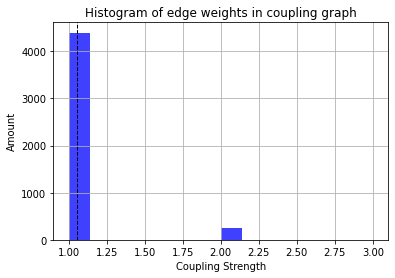

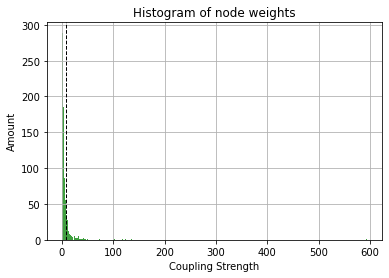

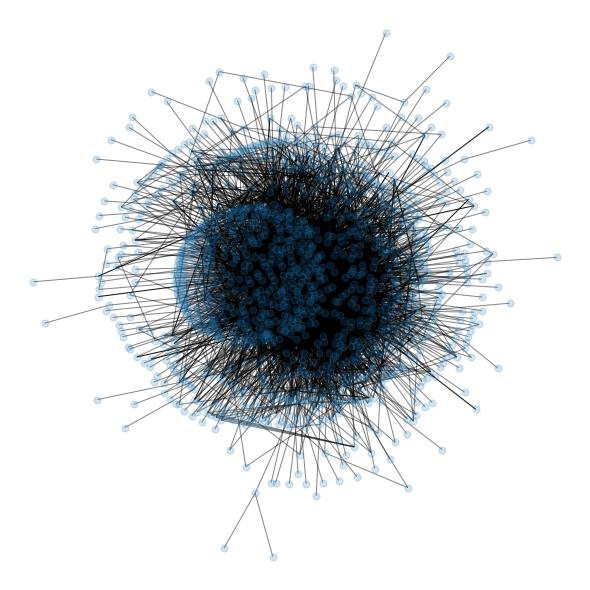




Program is over!


In [6]:
views = ["structural"] # ["structural", "evolutionary", "linguistic"]

for repo in repos:
    r = LocalRepo(repo)
    print(pyfiglet.figlet_format(r.name))
    r.update()
    
    # tree = RepoTree.init_from_repo(r)
    
    for view in views:
        # MetricManager.clear(r, view)

        coupling_graph = MetricManager.get(r, view)
        # coupling_graph.html_save(repo, view)
        
        
        print("Most linked nodes:")
        debug_list = sorted(list(coupling_graph.g.edges.data()), key = lambda e: -e[2]["weight"])
        print([str(info["weight"]) + ": " + a + " <> " + b for a, b, info in debug_list[0:10]])

        print("\nResults from the " + view + " view:\n")

        coupling_graph.print_statistics()
        coupling_graph.show_weight_histogram()
        coupling_graph.visualize(use_spring = True)
        print("\n")
    
    
print("\nProgram is over!")